In [1]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from operator import add


class State(TypedDict):
    foo: Annotated[list[str], add]


def agent_m1(state):
    return {"foo": ["m1"]}


def agent_m2(state):
    return {"foo": ["m2"]}


def agent_l1(state):
    return {"foo": ["l1"]}


def agent_l2(state):
    return {"foo": ["l2"]}


def agent_r1(state):
    return {"foo": ["r1"]}

# 创建子图
_sub_builder = StateGraph(State)
_sub_builder.add_node("node_l1", agent_l1)
_sub_builder.add_node("node_l2", agent_l2)
_sub_builder.add_edge(START, "node_l1")
_sub_builder.add_edge("node_l1", "node_l2")
_sub_builder.add_edge("node_l2", END)
# 创建主图
_builder = StateGraph(State)
_builder.add_node("node_m1", agent_m1)
_builder.add_node("node_m2", agent_m2)
_builder.add_node("node_r1", agent_r1)
# 创建子图结点
_builder.add_node("sub_graph", _sub_builder.compile())


_builder.add_edge(START, "node_m1")
_builder.add_edge("node_m1", "node_r1")
_builder.add_edge("node_m1", "sub_graph")
_builder.add_edge("sub_graph", "node_m2")
_builder.add_edge("node_r1", "node_m2")
_builder.add_edge("node_m2", END)

_graph = _builder.compile()

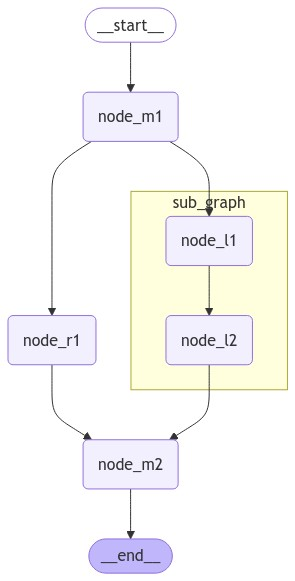

In [2]:
from IPython.display import display,Image

display(Image(_graph.get_graph(xray=1).draw_mermaid_png()))

In [4]:
_graph.invoke({"foo":[]})

{'foo': ['m1', 'r1', 'm1', 'l1', 'l2', 'm2']}